In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## EDA Phân tích và trực quan hóa dữ liệu về chất lượng không khí
Cho tập tin "Demo_Air_Quality_Dataset.xlsx" chứa dữ liệu mẫu về chất lượng không khí ở các thành phố ở US. Dữ liệu được ghi nhận từ năm 2000 đến 2010.


### 1. Đọc dữ liệu và tìm hiểu thông tin cơ bản về bộ dữ liệu.

In [55]:
import pandas as pd

# Đọc dữ liệu từ tập tin Excel
da = pd.read_excel('data/Demo_Air_Quality_Dataset.xlsx')


In [56]:
# Hiển thị 5 dòng đầu tiên của dữ liệu
da.head()

,City,Date,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,Phoenix,2000-01-01,19.041667,0.022500,3.000000,1.145833
1,Phoenix,2000-01-02,22.958333,0.013375,1.958333,0.850000
2,Phoenix,2000-01-03,38.125000,0.007958,5.250000,1.929167
3,Phoenix,2000-01-04,40.260870,0.014167,7.083333,1.991667
4,Phoenix,2000-01-05,48.450000,0.006667,8.708333,2.620833


In [57]:
# Hiển thị 5 dòng cuối cùng của dữ liệu
da.tail()

,City,Date,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
51246,Boston,2010-12-27,9.083333,0.029708,1.254545,0.177957
51247,Boston,2010-12-28,21.541667,0.023083,1.320833,0.214304
51248,Boston,2010-12-29,23.818182,0.012833,2.262500,0.256955
51249,Boston,2010-12-30,37.708333,0.005667,3.550000,0.479087
51250,Boston,2010-12-31,37.416667,0.006389,5.362500,0.558261


In [58]:
# Hiển thị kích thước của DataFrame (số hàng, số cột)
da.shape

(51251, 6)

In [59]:
# Hiển thị tên các cột
da.columns

Index(['City', 'Date', 'NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean'], dtype='object')

In [60]:
# Hiển thị các thống kê mô tả về các cột số trong DataFrame.
da.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,51216.000000,51195.000000,51203.000000,51190.000000
mean,15.158013,0.024862,2.589338,0.428772
std,11.419557,0.014128,3.338932,0.310987
min,0.000000,0.000000,0.000000,0.000000
25%,8.181818,0.016625,0.600000,0.241250
50%,13.625000,0.024458,1.458333,0.360870
75%,20.173913,0.032250,3.347826,0.537500
max,900.000000,0.990000,106.000000,3.791304


In [61]:
# Hiển thị thông tin về DataFrame, bao gồm kiểu dữ liệu, số lượng giá trị không bị thiếu và thông tin về bộ nhớ.
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51251 entries, 0 to 51250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   City      51251 non-null  object        
 1   Date      51251 non-null  datetime64[ns]
 2   NO2 Mean  51216 non-null  float64       
 3   O3 Mean   51195 non-null  float64       
 4   SO2 Mean  51203 non-null  float64       
 5   CO Mean   51190 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.3+ MB


In [62]:
# Hiển thị số lượng giá trị duy nhất trong mỗi cột
da.nunique()

City          31
Date        4018
NO2 Mean    5888
O3 Mean     2964
SO2 Mean    3723
CO Mean     5069
dtype: int64

In [63]:
# đếm số lượng hàng trùng lặp trong DataFrame df
da.duplicated().sum()

0

### 2. Có 1 số ngày cảm biến bị lỗi dẫn đến không đo được số liệu hoặc số liệu ghi nhận bị sai số rất lớn. Hãy tiến hành xử lý cho các giá trị bị thiếu và bị ghi nhận sai, giải thích tại sao lại lựa chọn cách xử lý như vậy?

In [64]:
# phát hiện giá trị thiếu trong DataFrame
missing_values = da.isnull().sum()
missing_values

City         0
Date         0
NO2 Mean    35
O3 Mean     56
SO2 Mean    48
CO Mean     61
dtype: int64

In [65]:
# Phát hiện null
colls_null=['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
da[da.isnull().any(axis=1)][colls_null]

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
612,14.130435,NaN,0.363636,0.539130
681,19.000000,0.006208,NaN,1.547619
905,2.086957,0.028708,0.043478,NaN
1220,NaN,0.019833,1.590909,0.373913
1259,6.391304,NaN,1.136364,0.278261
...,...,...,...,...
49227,22.160870,NaN,0.169565,0.610739
49245,23.460870,0.005500,NaN,0.681217
49888,5.750000,0.032500,NaN,0.180000
50935,25.208333,0.014958,1.700000,NaN


In [66]:
# kiểm tra dữ liệu 
print(da.sort_values(by='NO2 Mean', ascending=False))

                    City       Date  NO2 Mean   O3 Mean  SO2 Mean   CO Mean
36768            El Paso 2007-01-19     900.0  0.020375  0.000000  0.120833
19400            Concord 2004-05-17     800.0  0.028250  0.000000  0.226087
38973          Davenport 2008-04-13     700.0  0.036875  1.043478  0.217391
18021             Camden 2003-03-20     600.0  0.028333  1.000000  0.604167
13506            Detroit 2002-09-03     500.0  0.032292  3.416667  0.320833
...                  ...        ...       ...       ...       ...       ...
47785           Rosarito 2009-08-28       NaN  0.020824  1.660000  0.810000
48366  North Little Rock 2010-08-08       NaN  0.028875  1.083333  0.535714
48718            Concord 2010-07-18       NaN  0.026583  0.136364  0.300000
49007           San Jose 2010-05-03       NaN  0.018875  0.286957  0.327391
49086           San Jose 2010-07-21       NaN  0.020389  0.270000  0.148500

[51251 rows x 6 columns]


In [67]:
# Hiển thị các thống kê mô tả về các cột số trong DataFrame.
da.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,51216.000000,51195.000000,51203.000000,51190.000000
mean,15.158013,0.024862,2.589338,0.428772
std,11.419557,0.014128,3.338932,0.310987
min,0.000000,0.000000,0.000000,0.000000
25%,8.181818,0.016625,0.600000,0.241250
50%,13.625000,0.024458,1.458333,0.360870
75%,20.173913,0.032250,3.347826,0.537500
max,900.000000,0.990000,106.000000,3.791304


### Nhận xét:
- Ta thấy trên bảng dữ liệu da.describe()  được rằng từ vị trí 75% đến max tăng đột biến không queo qui luật nào, vì vậy ta có thể khẳng định được có oulier.

- outliers trong trường hợp trên là những giá trị bất thường, sai sót trong quá trình thu thập dữ liệu, dẫn đến việc sai số nên việc loại bỏ chúng sẽ làm cho dữ liệu trở nên chính xác hơn và kết quả phân tích sẽ được cải thiện.

## Xử lí các giá trị ngoại lai Outliers thay thế bằng giá trị trung bình:

In [68]:
# Tính giá trị mean của cột NO2 Mean
mean_NO2 = da['NO2 Mean'].mean()
# Xác định giá trị outliers
Q1 = da['NO2 Mean'].quantile(0.25)
Q3 = da['NO2 Mean'].quantile(0.75)
IQR = Q3 - Q1
outliers_NO2  = (da['NO2 Mean'] < (Q1 - 1.5 * IQR)) | (da['NO2 Mean'] > (Q3 + 1.5 * IQR))
# Thay thế outliers bằng giá trị mean
da.loc[outliers_NO2, 'NO2 Mean'] = mean_NO2

In [69]:
# Tính giá trị mean của cột O3 Mean
mean_o3 = da['O3 Mean'].mean()
# Xác định giá trị outliers
Q1 = da['O3 Mean'].quantile(0.25)
Q3 = da['O3 Mean'].quantile(0.75)
IQR = Q3 - Q1
outliers_O3 = (da['O3 Mean'] < (Q1 - 1.5 * IQR)) | (da['O3 Mean'] > (Q3 + 1.5 * IQR))
# Thay thế outliers bằng giá trị mean
da.loc[outliers_O3, 'O3 Mean'] = mean_o3

In [70]:
# Tính giá trị mean của cột SO2 Mean
mean_SO2 = da['SO2 Mean'].mean()
# Xác định giá trị outliers
Q1 = da['SO2 Mean'].quantile(0.25)
Q3 = da['SO2 Mean'].quantile(0.75)
IQR = Q3 - Q1
outliers_SO2 = (da['SO2 Mean'] < (Q1 - 1.5 * IQR)) | (da['SO2 Mean'] > (Q3 + 1.5 * IQR))
# Thay thế outliers bằng giá trị mean
da.loc[outliers_SO2, 'SO2 Mean'] = mean_SO2

In [71]:
# Tính giá trị mean của cột CO Mean
mean_CO = da['CO Mean'].mean()
# Xác định giá trị outliers
Q1 = da['CO Mean'].quantile(0.25)
Q3 = da['CO Mean'].quantile(0.75)
IQR = Q3 - Q1
outliers_CO = (da['CO Mean'] < (Q1 - 1.5 * IQR)) | (da['CO Mean'] > (Q3 + 1.5 * IQR))
# Thay thế outliers bằng giá trị mean
da.loc[outliers_CO, 'CO Mean'] = mean_CO

In [72]:
da.isnull().sum()

City         0
Date         0
NO2 Mean    35
O3 Mean     56
SO2 Mean    48
CO Mean     61
dtype: int64

In [73]:
# Hiển thị các thống kê mô tả về các cột số trong DataFrame.
da.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
count,51216.000000,51195.000000,51203.000000,51190.000000
mean,14.515122,0.024558,1.942310,0.381063
std,8.085497,0.010948,1.717521,0.206446
min,0.000000,0.000000,0.000000,0.000000
25%,8.181818,0.016625,0.600000,0.241250
50%,13.625000,0.024458,1.458333,0.360870
75%,19.521739,0.032042,2.589338,0.487500
max,38.136364,0.055667,7.458333,0.981818


### Nhận xét: 
- Sau khi thay thế các Outliers thì xem bảng da.describe() đã có tỉ lệ đồng đều hơn trước 

### Xử lí các giá trị bị thiếu Missing Value thay thế  bằng giá trị trung bình:

In [74]:
import pandas as pd

# Thay thế giá trị thiếu bằng giá trị trung bình của cột tương ứng
da = da.fillna(da.mean())
print(da.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51251 entries, 0 to 51250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   City      51251 non-null  object        
 1   Date      51251 non-null  datetime64[ns]
 2   NO2 Mean  51251 non-null  float64       
 3   O3 Mean   51251 non-null  float64       
 4   SO2 Mean  51251 non-null  float64       
 5   CO Mean   51251 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.3+ MB
None


In [75]:
# kiểm tra ngẫu nhiên các giá trị NaN trước đó 
da.loc[612:613, colls_null]

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
612,14.130435,0.024558,0.363636,0.539130
613,13.130435,0.022750,1.500000,0.556522


In [76]:
### kiểm tra lại null
da.isnull().sum()

City        0
Date        0
NO2 Mean    0
O3 Mean     0
SO2 Mean    0
CO Mean     0
dtype: int64

In [77]:
## Phát hiện trùng lặp
da.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51246    False
51247    False
51248    False
51249    False
51250    False
Length: 51251, dtype: bool

### Lý Do xử lí các giá trị bị thiếu Missing Value thay thế bằng giá trị trung bình
Ta thấy dữ liệu trên nó rời rạc và không theo quy luật nào cả, thay vì loại bỏ các dòng hoặc cột chứa giá trị bị thiếu, việc thay thế giá trị thiếu bằng giá trị trung bình giúp bảo toàn dữ liệu còn lại trong DataFrame. Điều này giúp giữ nguyên kích thước và cấu trúc của DataFrame ban đầu.

Khi xử lý dữ liệu với giá trị thiếu, việc thay thế chúng bằng giá trị trung bình giúp đơn giản hóa phân tích dữ liệu. Bằng cách điền giá trị trung bình vào các ô thiếu, chúng ta có thể tiếp tục sử dụng các phương pháp và công cụ phân tích dữ liệu tiếp theo mà không cần lo lắng về dữ liệu bị thiếu.

Thay thế giá trị thiếu bằng giá trị trung bình giúp đảm bảo tính thống nhất trong dữ liệu,  giúp giữ tính nhất quán và hợp lý trong dữ liệu.

### 3. Tạo cột “Month”,”Year”.

In [78]:
import pandas as pd


# Chuyển đổi cột 'Date' sang kiểu datetime nếu cần
da['Date'] = pd.to_datetime(da['Date'])

# Tạo cột 'Month' từ cột 'Date'
da['Month'] = da['Date'].dt.month

# Tạo cột 'Year' từ cột 'Date'
da['Year'] = da['Date'].dt.year

# Hiển thị 5 dòng đầu tiên của DataFrame đã có cột mới
print(da.head())


      City       Date   NO2 Mean   O3 Mean  SO2 Mean   CO Mean  Month  Year
0  Phoenix 2000-01-01  19.041667  0.022500  3.000000  0.428772      1  2000
1  Phoenix 2000-01-02  22.958333  0.013375  1.958333  0.850000      1  2000
2  Phoenix 2000-01-03  38.125000  0.007958  5.250000  0.428772      1  2000
3  Phoenix 2000-01-04  15.158013  0.014167  7.083333  0.428772      1  2000
4  Phoenix 2000-01-05  15.158013  0.006667  2.589338  0.428772      1  2000


In [79]:
# Chuyển cột "Year" sang kiểu dữ liệu datetime
da["Year"] = pd.to_datetime(da["Year"], format="%Y")

# Chuyển cột "Month" sang kiểu dữ liệu datetime
da["Month"] = pd.to_datetime(da["Month"], format="%m")

In [80]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51251 entries, 0 to 51250
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   City      51251 non-null  object        
 1   Date      51251 non-null  datetime64[ns]
 2   NO2 Mean  51251 non-null  float64       
 3   O3 Mean   51251 non-null  float64       
 4   SO2 Mean  51251 non-null  float64       
 5   CO Mean   51251 non-null  float64       
 6   Month     51251 non-null  datetime64[ns]
 7   Year      51251 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), object(1)
memory usage: 3.1+ MB


### 4. Tìm top 10 thành phố có nồng độ "NO2" cao nhất trong năm 2000 và vẽ đồ thị. 

In [81]:
# Lọc dữ liệu cho năm 2000
da_2000 = da[da['Date'].dt.year == 2000]

# Nhóm dữ liệu theo thành phố và tính trung bình NO2 Mean
da_grouped = da_2000.groupby('City')['NO2 Mean'].mean()

# Tìm top 10 thành phố có nồng độ NO2 cao nhất trong năm 2000
top10_cities = da_grouped.nlargest(10)

# Hiển thị thông tin top 10 thành phố kèm với nồng độ trung bình NO2 Mean
print("Top 10 thành phố có nồng độ NO2 cao nhất trong năm 2000:")
for city, no2_mean in top10_cities.iteritems():
    print(f"{city}: {no2_mean:.2f}")

Top 10 thành phố có nồng độ NO2 cao nhất trong năm 2000:
Chicago: 23.93
Phoenix: 22.65
Detroit: 21.57
Ladue: 20.88
Alexandria: 20.86
Calumet City (PU RR name Calumet Park (sta.)): 20.45
Camden: 19.15
Seven Corners: 19.01
St. Louis: 18.91
Baton Rouge: 17.03


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chicago'),
  Text(1, 0, 'Phoenix'),
  Text(2, 0, 'Detroit'),
  Text(3, 0, 'Ladue'),
  Text(4, 0, 'Alexandria'),
  Text(5, 0, 'Calumet City (PU RR name Calumet Park (sta.))'),
  Text(6, 0, 'Camden'),
  Text(7, 0, 'Seven Corners'),
  Text(8, 0, 'St. Louis'),
  Text(9, 0, 'Baton Rouge')])

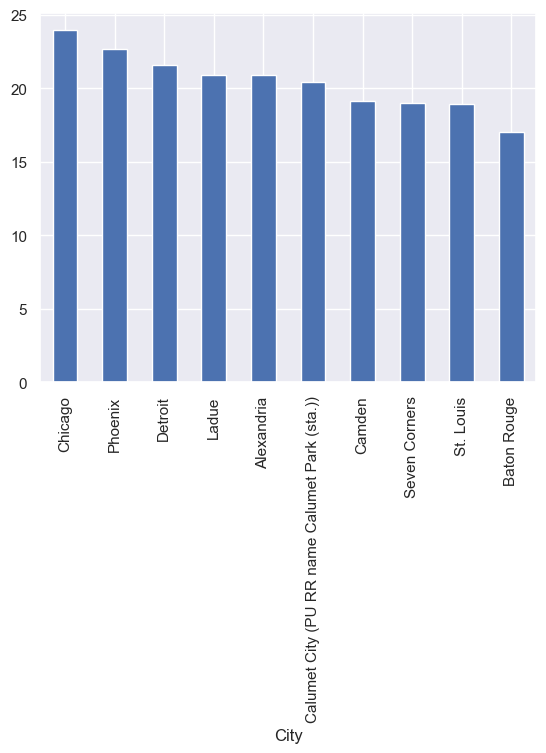

In [82]:
# Chuyển đổi cột 'Date' thành định dạng ngày-tháng-năm
da['Date'] = pd.to_datetime(da['Date'])

# Lọc dữ liệu cho năm 2000
da_2000 = da[da['Date'].dt.year == 2000]

# Tính trung bình NO2 Mean theo thành phố trong năm 2000 và lấy top 10 thành phố
top10_city = da_2000.groupby('City')['NO2 Mean'].mean().nlargest(10)

# Vẽ biểu đồ cột cho top 10 thành phố
top10_city.plot.bar(rot=60, grid=True, legend = False)
plt.xticks(rotation=90)

### Nhận xét: 
Dựa trên kết quả top 10 thành phố có nồng độ NO2 cao nhất trong năm 2000, chúng ta có thể rút ra một số nhận xét và ý nghĩa như sau:

1. Chicago và Phoenix là hai thành phố có nồng độ NO2 cao nhất trong năm 2000, với giá trị lần lượt là Chicago: 23.93 Phoenix: 22.65. Điều này cho thấy các thành phố này có mức độ ô nhiễm không khí cao trong năm đó.

2. Detroit, Alexandria và Ladue cũng có nồng độ NO2 đáng kể, lần lượt là 21.57, 20.88 và 20.86. Điều này có thể chỉ ra rằng các thành phố này cũng gặp phải vấn đề ô nhiễm không khí trong năm 2000.

3. Các thành phố khác như Calumet City, Camden, Seven Corners, St. Louis và Baton Rouge cũng có nồng độ NO2 cao, mặc dù thấp hơn so với các thành phố ở vị trí cao nhất. Điều này cho thấy rằng ô nhiễm không khí không chỉ xảy ra ở một số thành phố lớn, mà còn lan rộng đến các khu vực khác.

4. Kết quả này có thể làm cơ sở để các nhà quản lý và chính phủ địa phương đưa ra các biện pháp nhằm giảm ô nhiễm không khí và cải thiện chất lượng không khí trong các thành phố này.

5. Đồ thị cột được vẽ để trực quan hóa kết quả, giúp hiểu rõ hơn về mức độ ô nhiễm không khí của các thành phố. Bằng cách tăng cường quản lý môi trường và thúc đẩy sử dụng nguồn năng lượng sạch, các thành phố có thể cải thiện chất lượng không khí và bảo vệ sức khỏe của cộng đồng.

6. Các thành phố có nồng độ NO2 cao nhất đều là các trung tâm đô thị lớn của Mỹ, với mật độ dân số và giao thông vận tải cao, điều này có thể dẫn đến sự phát thải khí thải và ô nhiễm không khí

### Insight: 
- Việc tìm hiểu top 10 thành phố có nồng độ NO2 cao nhất trong năm 2000 là cần thiết để đưa ra các giải pháp nhằm giảm thiểu ô nhiễm không khí và bảo vệ sức khỏe của người dân. Các giải pháp có thể bao gồm:

- Áp dụng các quy định nghiêm ngặt về chất lượng không khí để giảm thiểu sự phát thải của các chất gây ô nhiễm.

- Đầu tư vào các công nghệ hiệu quả hơn để giảm thiểu sự phát thải của các chất gây ô nhiễm, như các công nghệ sản xuất sạch, các phương tiện giao thông thân thiện với môi trường.

- Tăng cường giám sát và theo dõi chất lượng không khí, để có thể đưa ra các biện pháp phòng ngừa và giảm thiểu tác động của ô nhiễm không khí đến sức khỏe của người dân.

- Tăng cường giáo dục và tạo ra nhận thức cộng đồng về ô nhiễm không khí, để mọi người có thể hành động để giảm thiểu tác động của ô nhiễm không khí đến môi trường và sức khỏe của họ.

- Danh sách top 10 thành phố này có thể giúp chính phủ và các tổ chức liên quan đưa ra những quyết định và chính sách để cải thiện chất lượng không khí và giảm thiểu ô nhiễm tại các thành phố này, nhằm đảm bảo sức khỏe và sự an toàn cho người dân.

- Các thành phố có nồng độ NO2 cao cần có các biện pháp kiểm soát ô nhiễm, bao gồm cải thiện quy trình công nghiệp, sử dụng năng lượng sạch, và thúc đẩy các phương tiện giao thông sạch để giảm thiểu tác động tiêu cực lên môi trường và sức khỏe cộng đồng.


### 5. Tìm top 10 thành phố có nồng độ "SO2" cao nhất trong năm 2010 và vẽ đồ thị. 

In [83]:
# Lọc dữ liệu cho năm 2000
da_2010 = da[da['Date'].dt.year == 2010]

# Nhóm dữ liệu theo thành phố và tính trung bình NO2 Mean
da_group = da_2010.groupby('City')['SO2 Mean'].mean()

# Tìm top 10 thành phố có nồng độ NO2 cao nhất trong năm 2000
top10_cities_2010 = da_group.nlargest(10)

# Hiển thị thông tin top 10 thành phố kèm với nồng độ cao nhất SO2 trong năm 2010
print("Top 10 thành phố có nồng độ SO2 cao nhất trong năm 2010:")
for City, so2_mean in top10_cities_2010.iteritems():
    print(f"{City}: {so2_mean:.2f}")

Top 10 thành phố có nồng độ SO2 cao nhất trong năm 2010:
Indianapolis (Remainder): 2.66
Phoenix: 1.74
North Little Rock: 1.70
Boston: 1.56
Baton Rouge: 1.14
Oakland: 1.01
Welby: 0.99
Westport: 0.60
Vallejo: 0.56
Davenport: 0.54


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indianapolis (Remainder)'),
  Text(1, 0, 'Phoenix'),
  Text(2, 0, 'North Little Rock'),
  Text(3, 0, 'Boston'),
  Text(4, 0, 'Baton Rouge'),
  Text(5, 0, 'Oakland'),
  Text(6, 0, 'Welby'),
  Text(7, 0, 'Westport'),
  Text(8, 0, 'Vallejo'),
  Text(9, 0, 'Davenport')])

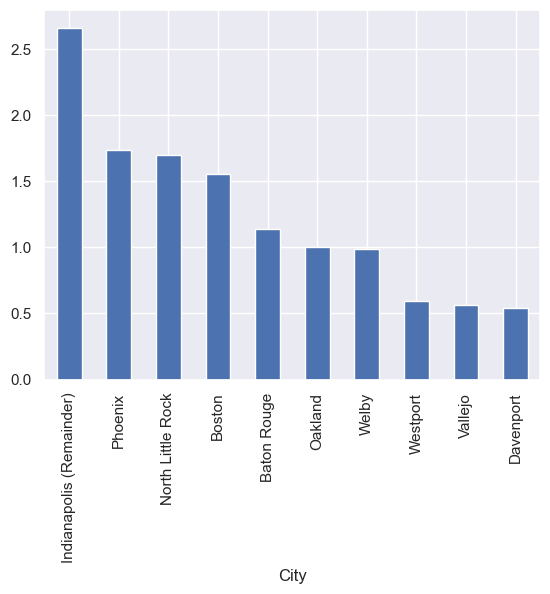

In [84]:
# Chuyển đổi cột 'Date' thành định dạng ngày-tháng-năm
da['Date'] = pd.to_datetime(da['Date'])

# Lọc dữ liệu cho năm 2000
da_2010 = da[da['Date'].dt.year == 2010]

# Tính trung bình NO2 Mean theo thành phố trong năm 2000 và lấy top 10 thành phố
top10_city_2010 = da_2010.groupby('City')['SO2 Mean'].mean().nlargest(10)

# Vẽ biểu đồ cột cho top 10 thành phố
top10_city_2010.plot.bar(rot=60, grid=True, legend = False)
plt.xticks(rotation=90)

### Nhận xét:
- Các thành phố này được xếp hạng cao về mức độ ô nhiễm SO2 trong năm 2010. Điều này có thể chỉ ra tình trạng không khí không tốt và có thể gây hại cho sức khỏe của cư dân địa phương. Các thành phố này có thể cần thực hiện các biện pháp để giảm ô nhiễm SO2 và cải thiện chất lượng không khí.

- Nồng độ SO2 trong không khí của các thành phố này vượt quá mức cho phép, đặc biệt là thành phố Indianapolis (Remainder) với nồng độ SO2 trung bình lên tới 2.66 ppb.

- Thành phố Phoenix và North Little Rock cũng có nồng độ SO2 khá cao, lần lượt là 1.74 ppb và 1.70 ppb.

- Boston, Baton Rouge, Welby, Oakland, Westport, Vallejo và Davenport cũng có nồng độ SO2 vượt quá mức cho phép, với các giá trị lần lượt là 1.56 ppb, 1.14 ppb, 1.01 ppb,  0.99 ppb, 0.60 ppb, 0.56 ppb và 0.54 ppb.

- Nồng độ SO2 cao trong không khí có thể gây ra các vấn đề liên quan đến sức khỏe, đặc biệt là về hệ hô hấp. Điều này đòi hỏi cần có các giải pháp và chính sách cụ thể để giảm thiểu ô nhiễm và cải thiện chất lượng không khí.

- Danh sách top 10 thành phố này cung cấp thông tin quý giá cho các nhà quản lý và chính trị gia để đưa ra các quyết định và chính sách liên quan đến vấn đề ô nhiễm không khí và bảo vệ môi trường, nhằm đảm bảo sức khỏe và sự an toàn cho người dân.

### Insight: 
- Việc tìm hiểu top 10 thành phố có nồng độ SO2 cao nhất trong năm 2010 là cần thiết để đưa ra các giải pháp nhằm giảm thiểu ô nhiễm không khí và bảo vệ sức khỏe của người dân. Các giải pháp có thể bao gồm:

- Áp dụng các quy định nghiêm ngặt về chất lượng không khí để giảm thiểu sự phát thải của các chất gây ô nhiễm.

- Đầu tư vào các công nghệ hiệu quả hơn để giảm thiểu sự phát thải của các chất gây ô nhiễm, như các công nghệ sản xuất sạch, các phương tiện giao thông thân thiện với môi trường.

- Tăng cường giám sát và theo dõi chất lượng không khí, để có thể đưa ra các biện pháp phòng ngừa và giảm thiểu tác động của ô nhiễm không khí đến sức khỏe của người dân.

- Tăng cường giáo dục và tạo ra nhận thức cộng đồng về ô nhiễm không khí, để mọi người có thể hành động để giảm thiểu tác động của ô nhiễm không khí đến môi trường và sức khỏe của họ.

- Việc nhận thức về các thành phố có mức độ ô nhiễm SO2 cao nhất trong năm 2010 có thể giúp các cơ quan chức năng và cộng đồng địa phương đưa ra các biện pháp cải thiện chất lượng không khí, nhằm giảm thiểu tác động tiêu cực đến sức khỏe của người dân và môi trường.

- Nồng độ SO2 cao trong không khí có thể gây ra các vấn đề liên quan đến sức khỏe, đặc biệt là về hệ hô hấp. Điều này đòi hỏi cần có các giải pháp và chính sách cụ thể để giảm thiểu ô nhiễm và bảo vệ sức khỏe cho người dân.

- Danh sách top 10 thành phố này cung cấp thông tin quý giá cho các nhà quản lý và chính trị gia để đưa ra các quyết định và chính sách liên quan đến vấn đề ô nhiễm không khí và bảo vệ môi trường, nhằm đảm bảo sức khỏe và sự an toàn cho người dân.


### 6. Các chất gây ô nhiễm có thay đổi theo thời gian hay không. Chứng minh bằng số liệu và đồ thị.

##### Hệ số tương quan sẽ là một giá trị trong khoảng từ -1 đến 1, trong đó:

- Giá trị gần 1 cho thấy có một mối tương quan dương mạnh giữa NO2 Mean và Year.
- Giá trị gần -1 cho thấy có một mối tương quan âm mạnh giữa NO2 Mean và Year.
- Giá trị gần 0 cho thấy không có mối tương quan tuyến tính giữa NO2 Mean và Year.

## NO2 mean theo năm:

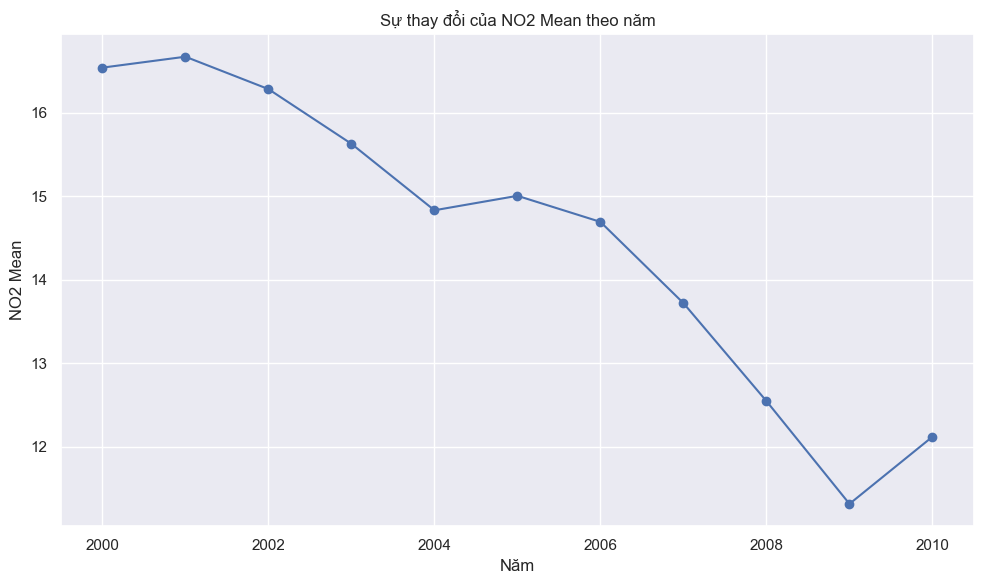

Tương quan giữa NO2 Mean và Year: -0.2080076017486306


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Date' thành định dạng số
da['Year'] = da['Date'].dt.year

# Tạo biểu đồ thể hiện sự thay đổi của NO2 Mean theo năm
plt.figure(figsize=(10, 6))
da.groupby(da['Year'])['NO2 Mean'].mean().plot(marker='o')
plt.xlabel('Năm')
plt.ylabel('NO2 Mean')
plt.title('Sự thay đổi của NO2 Mean theo năm')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kiểm tra tương quan giữa NO2 Mean theo năm
correlation = da['NO2 Mean'].corr(da['Year'])
print("Tương quan giữa NO2 Mean và Year:", correlation)


### Nhận xét: 
- Kết quả hệ số tương quan giữa NO2 Mean và Year là -0.2080076017486306, ta có thể kết luận rằng có một mối tương quan âm nhỏ giữa NO2 Mean và Year. Tuy nhiên, hệ số tương quan này khá gần với 0, cho thấy sự tương quan giữa NO2 Mean và Year không mạnh. Điều này có nghĩa là nồng độ NO2 Mean có xu hướng không thay đổi đáng kể theo năm

- Do đó, để xác định mức độ thay đổi của NO2 Mean theo năm, chúng ta cần phân tích dữ liệu chi tiết hơn và sử dụng các phương pháp thống kê và trực quan hóa dữ liệu khác nhau.

## O3 mean theo năm:

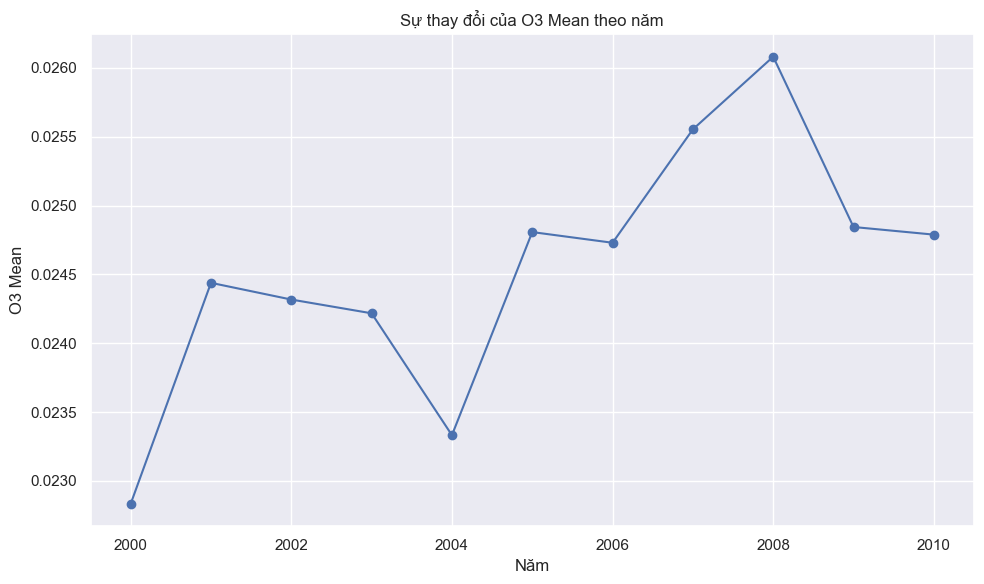

Tương quan giữa O3 Mean và Year: 0.05959359806781465


In [86]:
# Tạo biểu đồ thể hiện sự thay đổi của O3 Mean theo năm
plt.figure(figsize=(10, 6))
da.groupby(da['Year'])['O3 Mean'].mean().plot(marker='o')
plt.xlabel('Năm')
plt.ylabel('O3 Mean')
plt.title('Sự thay đổi của O3 Mean theo năm')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kiểm tra tương quan giữa O3 Mean theo năm
correlation = da['O3 Mean'].corr(da['Year'])
print("Tương quan giữa O3 Mean và Year:", correlation)

### Nhận xét:
- Dựa vào giá trị tương quan tính toán là 0.05959359806781465, ta thấy rằng nồng độ O3 (O3 Mean) có một mối tương quan rất yếu và gần như không có tương quan với thời gian (Year). Giá trị tương quan này gần với 0, cho thấy không có mối liên hệ đáng kể giữa nồng độ O3 và năm. 

- Do đó, có thể kết luận rằng nồng độ O3 (O3 Mean) không có sự thay đổi đáng kể theo thời gian (Year).

## SO2 Mean theo năm:

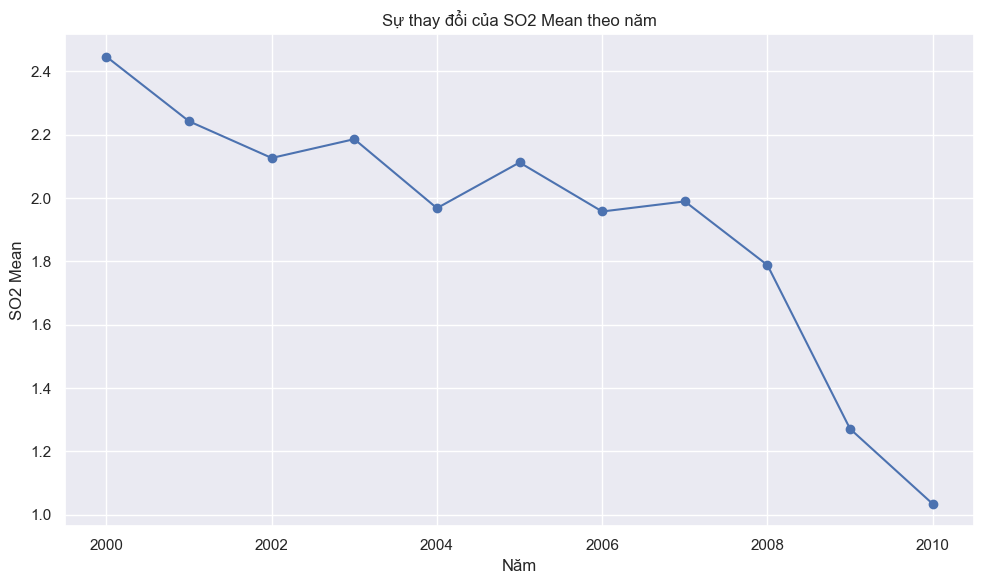

Tương quan giữa SO2 Mean  và Year: -0.1963108766432126


In [87]:
# Tạo biểu đồ thể hiện sự thay đổi của SO2 Mean  theo năm
plt.figure(figsize=(10, 6))
da.groupby(da['Year'])['SO2 Mean'].mean().plot(marker='o')
plt.xlabel('Năm')
plt.ylabel('SO2 Mean')
plt.title('Sự thay đổi của SO2 Mean theo năm')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kiểm tra tương quan giữa SO2 Mean  theo năm
correlation = da['SO2 Mean'].corr(da['Year'])
print("Tương quan giữa SO2 Mean  và Year:", correlation)

### Nhận xét: 
- Kết quả hệ số tương quan giữa SO2 Mean và Year là -0.1963108766432126, cho thấy có một mối tương quan âm nhẹ giữa SO2 Mean và Year,  mối quan hệ giữa SO2 Mean và Year không mạnh mẽ. Điều này cho thấy rằng SO2 Mean có thể thay đổi theo năm và giảm dần theo thời gian. 

- Tuy nhiên, hệ số tương quan này khá thấp, tức là tương quan giữa SO2 Mean và Year không mạnh lắm và có thể bị ảnh hưởng bởi nhiễu hoặc các yếu tố khác. Do đó, để xác định mức độ thay đổi của SO2 Mean theo năm, chúng ta cần phân tích dữ liệu chi tiết hơn và sử dụng các phương pháp thống kê và trực quan hóa dữ liệu khác nhau.

## CO Mean theo năm:

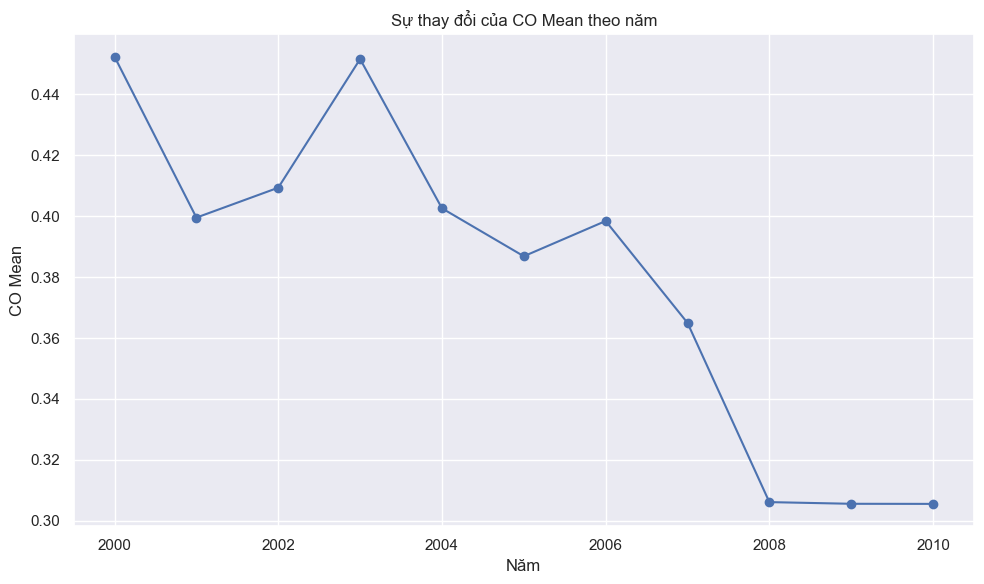

Tương quan giữa CO Mean  và Year: -0.2208164413672298


In [88]:
# Tạo biểu đồ thể hiện sự thay đổi của CO Mean  theo năm
plt.figure(figsize=(10, 6))
da.groupby(da['Year'])['CO Mean'].mean().plot(marker='o')
plt.xlabel('Năm')
plt.ylabel('CO Mean')
plt.title('Sự thay đổi của CO Mean theo năm')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kiểm tra tương quan giữa CO Mean  theo năm
correlation = da['CO Mean'].corr(da['Year'])
print("Tương quan giữa CO Mean  và Year:", correlation)

### Nhận xét: 
- Dựa vào giá trị tương quan tính toán là -0.2208164413672298,cho thấy có một mối quan hệ âm (tức là khi Year tăng thì CO Mean giảm và ngược lại). Tuy nhiên, tương quan này khá thấp, chỉ khoảng -0.22, cho thấy mối quan hệ giữa CO Mean và Year không mạnh mẽ.
- Tuy nhiên, giá trị tương quan này cũng khá nhỏ, chỉ đạt khoảng -0.2208164413672298. Điều này cho thấy sự thay đổi của nồng độ CO không phụ thuộc mạnh vào thời gian (Year). Cần phải tiến hành phân tích chi tiết hơn để hiểu rõ hơn về mối quan hệ giữa CO Mean và thời gian.

### 7. Tìm mối quan hệ giữa các tác nhân ô nhiễm "NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean", yêu cầu sử dụng phương pháp toán học và đồ thị. Nhận xét kết quả.

### Scatter plot giữa CO Mean và NO2 Mean ở Concord:

          NO2 Mean   O3 Mean  SO2 Mean   CO Mean
NO2 Mean  1.000000 -0.372909  0.326932  0.462759
O3 Mean  -0.372909  1.000000 -0.045642 -0.319317
SO2 Mean  0.326932 -0.045642  1.000000  0.164867
CO Mean   0.462759 -0.319317  0.164867  1.000000


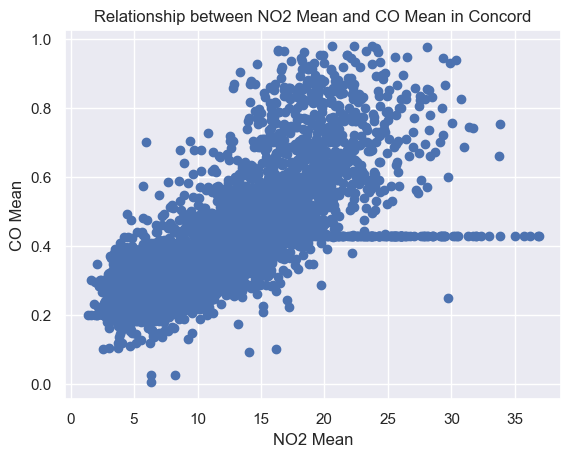

In [89]:
# Lấy các cột cần thiết
cols = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']

# Tính ma trận tương quan
corr_matrix = da[cols].corr()

# Hiển thị ma trận tương quan
print(corr_matrix)
# Lấy dữ liệu của Concord và lọc các cột cần thiết
concord_data = da[da['City'] == 'Concord'][['NO2 Mean', 'CO Mean']]

# Vẽ scatter plot giữa nồng độ CO Mean và nồng độ NO2 Mean ở Concord
plt.scatter(concord_data['NO2 Mean'], concord_data['CO Mean'])
plt.xlabel('NO2 Mean')
plt.ylabel('CO Mean')
plt.title('Relationship between NO2 Mean and CO Mean in Concord')
plt.show()

### Nhận xét: Dựa vào ma trận tương quan và scatter plot giữa CO Mean và NO2 Mean ở Concord, ta có thể rút ra các nhận xét như sau:

1. Ma trận tương quan cho thấy có mối tương quan dương vừa đến cao giữa CO Mean và NO2 Mean. Hệ số tương quan là 0.462759, cho thấy mối quan hệ khá chặt chẽ giữa hai biến này.

2. Scatter plot cũng thể hiện mối quan hệ dương giữa CO Mean và NO2 Mean ở Concord. Các điểm trên đồ thị phân bố gần một đường hướng tăng dần, cho thấy khi nồng độ NO2 Mean tăng thì nồng độ CO Mean cũng tăng theo.

3. Tuy nhiên, cần lưu ý rằng việc có mối quan hệ giữa hai biến không có nghĩa là có mối quan hệ nhân quả giữa chúng. Điều này chỉ cho thấy sự tương quan và phụ thuộc thông tin trong dữ liệu, nhưng không thể kết luận về mối quan hệ nguyên nhân-giai đoạn giữa CO Mean và NO2 Mean.

4. Đồ thị cũng cho thấy có một số điểm nằm xa khỏi đường tuyến tính, đó có thể là những giá trị ngoại lệ (outliers) hoặc có sự biến động bất thường trong dữ liệu.

- Tóm lại, CO Mean và NO2 Mean ở Concord có mối quan hệ dương khá chặt chẽ, tuy nhiên cần xem xét các yếu tố khác để hiểu rõ hơn về mối quan hệ giữa hai biến này.

### Scatter plot giữa NO2 Mean và O3 Mean ở Vallejo:

          NO2 Mean   O3 Mean  SO2 Mean   CO Mean
NO2 Mean  1.000000 -0.372909  0.326932  0.462759
O3 Mean  -0.372909  1.000000 -0.045642 -0.319317
SO2 Mean  0.326932 -0.045642  1.000000  0.164867
CO Mean   0.462759 -0.319317  0.164867  1.000000


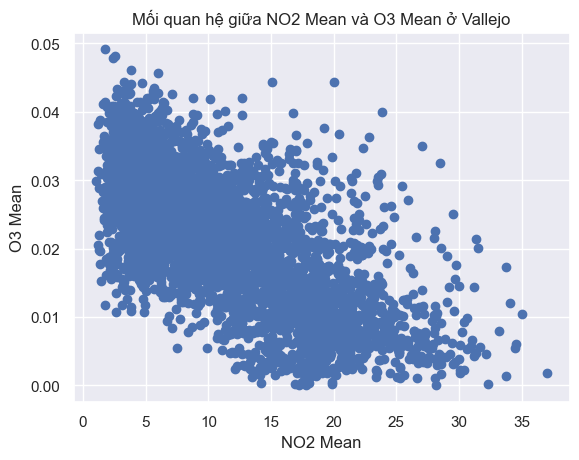

In [90]:

# Chọn các cột quan tâm
cols = ["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"]

# Tính ma trận tương quan
corr_matrix = da[cols].corr()

# In ra ma trận tương quan
print(corr_matrix)

# Scatter plot giữa NO2 Mean và O3 Mean ở Vallejo
vallejo_data = da[da["City"] == "Vallejo"][["NO2 Mean", "O3 Mean"]]
plt.scatter(vallejo_data["NO2 Mean"], vallejo_data["O3 Mean"])
plt.xlabel("NO2 Mean")
plt.ylabel("O3 Mean")
plt.title("Mối quan hệ giữa NO2 Mean và O3 Mean ở Vallejo")
plt.show()

### Nhận xét: Dựa trên ma trận tương quan và biểu đồ scatter plot giữa "NO2 Mean" và "O3 Mean" ở thành phố Vallejo, chúng ta có thể rút ra một số nhận xét sau:

- Trong ma trận tương quan, ta thấy rằng "NO2 Mean" và "O3 Mean" có một mối quan hệ tương quan âm với giá trị -0.372909. Điều này cho thấy có sự tương quan đảo ngược giữa hai chất ô nhiễm này. Tức là khi nồng độ "NO2 Mean" tăng lên, nồng độ "O3 Mean" giảm xuống và ngược lại.

- Trên biểu đồ scatter plot, chúng ta thấy sự phân tán của các điểm quanh một đường xu hướng giảm dần. Điều này cũng hỗ trợ nhận định về mối quan hệ tương quan âm giữa "NO2 Mean" và "O3 Mean" ở Vallejo.

- Như vậy, có thể kết luận rằng nồng độ "NO2 Mean" và "O3 Mean" ở thành phố Vallejo có mối quan hệ tương quan âm, tức là khi một chất ô nhiễm tăng lên, chất ô nhiễm kia có xu hướng giảm đi và ngược lại.

### Scatter plot giữa SO2 Mean và NO2 Mean ở Vallejo:

          NO2 Mean   O3 Mean  SO2 Mean   CO Mean
NO2 Mean  1.000000 -0.372909  0.326932  0.462759
O3 Mean  -0.372909  1.000000 -0.045642 -0.319317
SO2 Mean  0.326932 -0.045642  1.000000  0.164867
CO Mean   0.462759 -0.319317  0.164867  1.000000


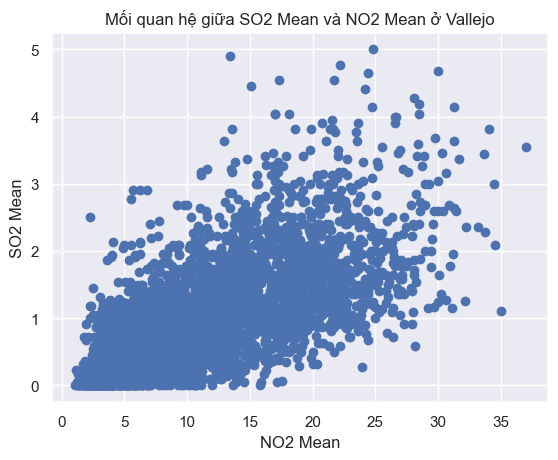

In [91]:
# Chọn các cột quan tâm
cols = ["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"]

# Tính ma trận tương quan
corr_matrix = da[cols].corr()

# In ra ma trận tương quan
print(corr_matrix)

# Scatter plot giữa SO2 Mean và NO2 Mean ở Vallejo
vallejo_data = da[da["City"] == "Vallejo"][["SO2 Mean", "NO2 Mean"]]
plt.scatter(vallejo_data["NO2 Mean"], vallejo_data["SO2 Mean"])
plt.xlabel("NO2 Mean")
plt.ylabel("SO2 Mean")
plt.title("Mối quan hệ giữa SO2 Mean và NO2 Mean ở Vallejo")
plt.show()

### Nhận xét: Dựa trên ma trận tương quan, chúng ta có thể nhận xét mối quan hệ giữa "SO2 Mean" và "NO2 Mean" ở thành phố Vallejo
- Giá trị tương quan là 0.326932,Biểu đồ scatter plot cho thấy có một mối quan hệ tương đối mạnh giữa SO2 Mean và NO2 Mean ở Vallejo. Các điểm dữ liệu phân bố theo một đường hơi cong, cho thấy có một mối tương quan dương giữa hai tác nhân ô nhiễm này

- Trên biểu đồ scatter plot, chúng ta có thể xem xét phân bố các điểm dữ liệu của "SO2 Mean" và "NO2 Mean" tại Vallejo. Sự phân tán của các điểm sẽ cho ta cái nhìn tổng quan về mối quan hệ giữa hai tác nhân này.

